## **Loading Data**

**1. Import required libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

**2. Data Load**

In [2]:
df = pd.read_csv('C:\\Users\\sayak\\OneDrive\\Desktop\\IMP\\Personal\\Projects\\Stock Market\\stocks.csv')
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000
...,...,...,...,...,...,...,...,...
243,GOOG,2023-05-01,107.720001,108.680000,107.500000,107.709999,107.709999,20926300
244,GOOG,2023-05-02,107.660004,107.730003,104.500000,105.980003,105.980003,20343100
245,GOOG,2023-05-03,106.220001,108.129997,105.620003,106.120003,106.120003,17116300
246,GOOG,2023-05-04,106.160004,106.300003,104.699997,105.209999,105.209999,19780600


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


**3. Checking Null Values**

In [5]:
df.isnull().any()

Ticker       False
Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

**4. Checking the correlation**

In [6]:
df_float = df.select_dtypes(include=['float']) 
df_float.corr()

,Open,High,Low,Close,Adj Close
Open,1.000000,0.999626,0.999650,0.999176,0.999173
High,0.999626,1.000000,0.999654,0.999644,0.999640
Low,0.999650,0.999654,1.000000,0.999663,0.999661
Close,0.999176,0.999644,0.999663,1.000000,0.999999
Adj Close,0.999173,0.999640,0.999661,0.999999,1.000000


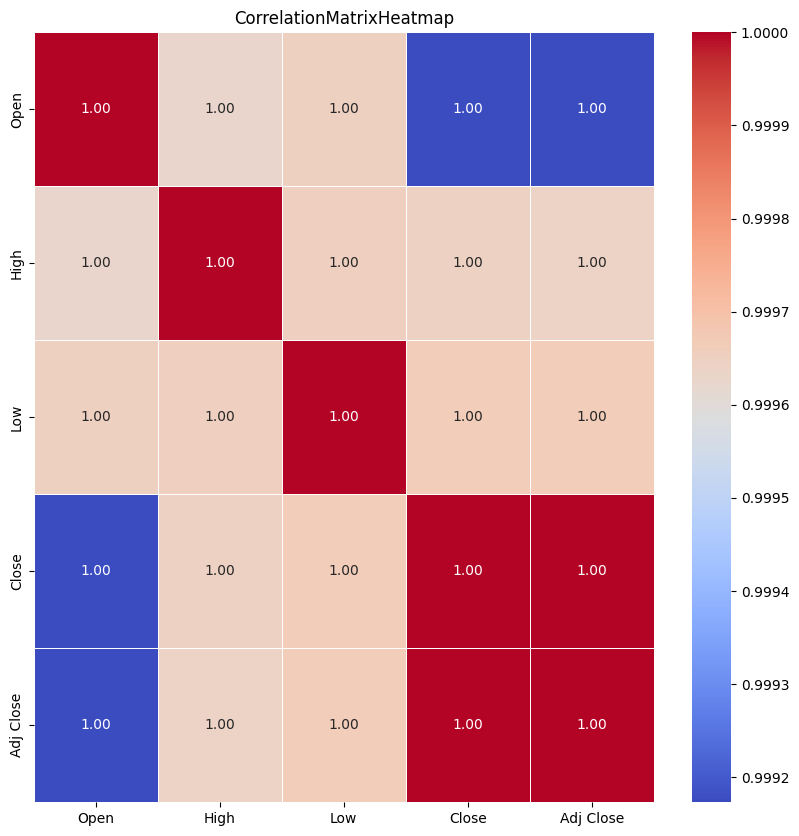

In [7]:
correlation_matrix=df_float.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',linewidths=0.5,fmt='.2f')
plt.title("CorrelationMatrixHeatmap")
plt.show()

**The distribution of the closing prices to understand their range and frequency.**

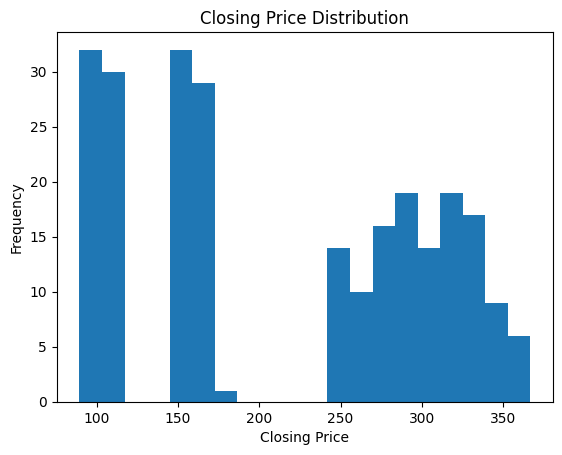

In [19]:

plt.hist(df['Close'], bins=20)
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.title('Closing Price Distribution')
plt.show()

**The cumulative volume traded over time to observe any trends or spikes.**

Text(0.5, 1.0, 'Total Volume by Ticker')

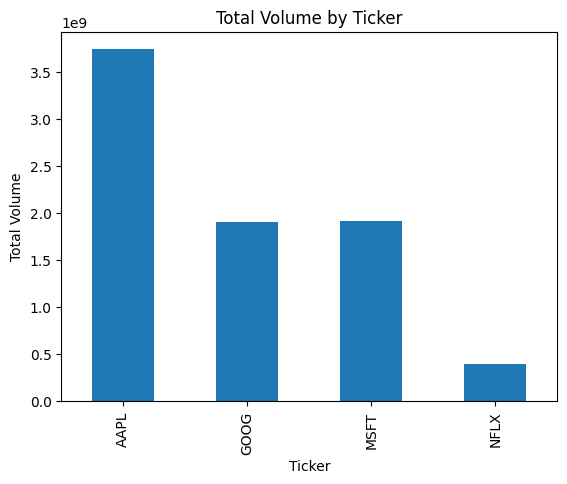

In [15]:
ticker_volume = df.groupby('Ticker')['Volume'].sum()
ticker_volume.plot(kind='bar')
plt.xlabel('Ticker')
plt.ylabel('Total Volume')
plt.title('Total Volume by Ticker')

**Exploring the relationship between volume and closing prices,to identify any correlations.**

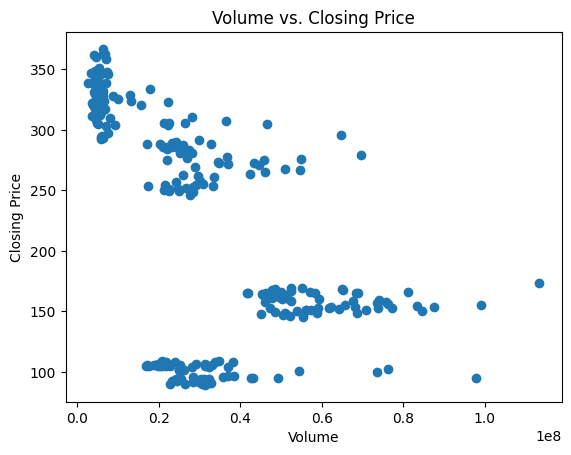

In [20]:
plt.scatter(df['Volume'], df['Close'])
plt.xlabel('Volume')
plt.ylabel('Closing Price')
plt.title('Volume vs. Closing Price')
plt.show()

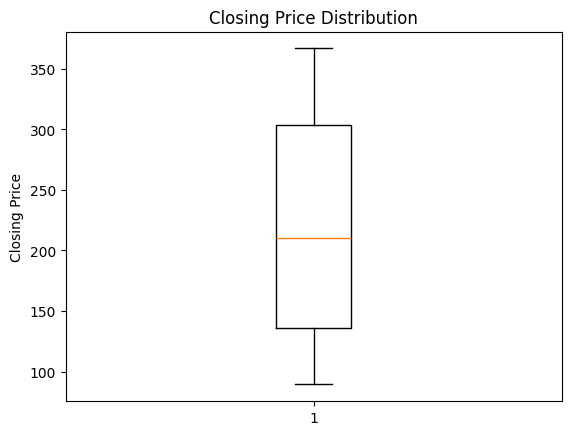

In [11]:
#Illustrating the distribution of the closing prices, includingthe median, quartiles, and outliers.
plt.boxplot(df['Close'])
plt.ylabel('Closing Price')
plt.title('Closing Price Distribution')
plt.show()

In [12]:
df.head(5)

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


**Model For Prediction**

**Importing Libraries**

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

**Model**

In [32]:
#Create the target: tomorrow's closing price
df['Target'] = df['Close'].shift(-1)

# Create lag features: previous days' prices
for i in range(1, 200):
    df[f'Close_t-{i}'] = df['Close'].shift(i)

#Drop rows with missing values
ml_df = df.dropna()

#Define features and target
X = ml_df[[f'Close_t-{i}' for i in range(1, 200)]]
y = ml_df['Target']

#Split data for training/testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)

#Train and test the model
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

#Evaluate performance
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))


RMSE: 2.021988169347415
R^2 Score: -1.302783421565652


**Model Validation**

In [30]:
latest_prices = df.tail(199)['Close'].values[::-1].reshape(1, -1)
next_day_pred = model.predict(latest_prices)
print("Predicted Next Day Close Price (AAPL):", next_day_pred[0])

Predicted Next Day Close Price (AAPL): 105.06144064144554


C:\Users\sayak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
